Student name: LYNN WANJIKU NDERO

Student pace: FULL TIME

Scheduled project review date/time: 1 WEEK

# FORECASTING REAL ESTATE PRICES USING TIME SERIES MODEL
   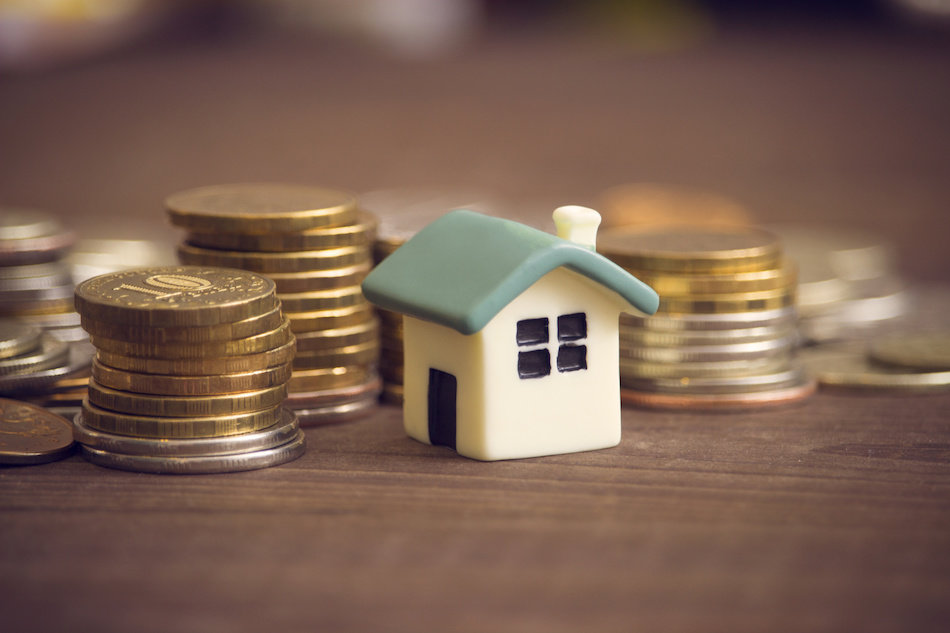

## Table of Contents
1. [Introduction](#introduction)
2. [Business Understanding](#business-understanding)
3. [Problem Statement](#problem-statement)
4. [Main Objective](#main-objective)
5. [Research Questions](#research-questions)
6. [Loading data](#loading-data)
7. [Data Preprocessing](#data-preprocessing)\
     i)Calculating ROI and CV \
     ii)Checking for outliers\
     iii)Handling missing values
8.  [Exploratory Data Analysis And Visualization] 
9.  [Model Building](#model-building)
10. [Model Interpretation](#model-interpretation)
11. [Conclusion](#conclusion)
15. [Recommendations](#recommendations)




# 1. Business understanding

## a) Introduction
Laser investment firm is a reputable  real estate investment firm that is dedicated to assist their clients to achieve their financial goal through implementing strategic real estate investment. It boasts of its ability to deliver exceptional value to their clients by identifying and capitalizing on lucrative real estate opportunities.
Our main goal is to forecast the top best zipcodes to invest in by use of time series model.


## b) Problem statement
Laser investment firm wants to know the top 5 best zipcodes to invest in. For this to be effective and achievable, they need to have a deep understanding on how the trends on real estate investments have been over the past years as seen in 'time-series/zillow_data.csv' dataset. Moreover, our goal is to complete this real-world task in regard to time series modeling to help answer the questions considering there could be some form of ambiguity. We will look at valuable insights by looking at the Return On Investment and Co-efficient of variation over the past years to help plan and make informed decisions.


## c) Main objective
The main objective of this project is to design and implement a time series model  that can effectively help forecast real estate prices for investments.

## d) Specific objectives
1. Top 5 best zip codes to invest in
2. Recommendations based on profit margin


## e) Research question

1. What are the top 5 best zip codes to invest in?
2. What recommendations can you give based on profit margin?
3. Are there any risks involved in investmenting in the zipcode areas?

# 2. Data Understanding
For this project, we shall use 'time-series/zillow_data.cvs' dataset to analyze the real estate prices from 1996 to 2018 so as to help decide which areas to invest in.\
The columns in the dataset are:\
       1.RegionID  \
       2.RegionName \
       3.City  \
       4.State \
       5.Metro\
       6.CountyName\
       7.SizeRank \
       8..1996-04 to 2018-04 columns
  


# 3. Loading Data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


%matplotlib inline

In [25]:
#load csv file into a DataFrame
df = pd.read_csv('zillow_data.csv')
df

RegionID  RegionName                 City State              Metro   
0         84654       60657              Chicago    IL            Chicago  \
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07   
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500  \
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03   
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800  \
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [26]:
#checking the datatypes in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


## 3.1 Renaming RegionName column

In [27]:
#renaming the'RegionName' column to 'Zipcode'
df.rename(columns ={'RegionName':'ZipCode'}, inplace=True)
df.head()

RegionID  ZipCode      City State              Metro CountyName  SizeRank   
0     84654    60657   Chicago    IL            Chicago       Cook         1  \
1     90668    75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982    77494      Katy    TX            Houston     Harris         3   
3     84616    60614   Chicago    IL            Chicago       Cook         4   
4     93144    79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10   
0  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800  1009600  \
1  235700.0  236900.0  236700.0  ...   308000   310000   312500   314100   
2  210400.0  212200.0  212200.0  ...   321000   320600   320200   320400   
3  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400  1291500   
4   77300.0   77300.0   77300.0  ...   119100   119400   120000   120300   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1013300  1018700  1024400  1030700  1033800  1030600  
1   315000   316600   318100   319600   321100   321800  
2   320800   321200   321200   323000   326900   329900  
3  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [29]:
#converting Zipcode column to an object datatype  
df['ZipCode']  = df['ZipCode'].astype('string')

print(df.ZipCode.min())
print(df.ZipCode.max())

1001
99901


# 4. Data Preprocessing
In this step we shall look adding a ROI(Return Of Investment) and CV(Co-efficient of Variance) columns to df dataset.
There after we shall look for outliers, remove outliers, check for missing values and filling them.

## 4.1 Creating ROI and CV columns
For ROI, we shall get the difference between the recent year investment(2018-04) and first year investment (1996-04) of each regionID and then divide the result by the first year investment.

For CV, we shall first get the mean and standard deviation(std) of each year,  then divide each std by each mean

In [30]:
#calculating the return of investment column and adding it to df 
df['ROI'] = ((df['2018-04'] - df['1996-04']) / df['1996-04'])
df.head()

RegionID ZipCode      City State              Metro CountyName  SizeRank   
0     84654   60657   Chicago    IL            Chicago       Cook         1  \
1     90668   75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982   77494      Katy    TX            Houston     Harris         3   
3     84616   60614   Chicago    IL            Chicago       Cook         4   
4     93144   79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  2017-11   
0  334200.0  335400.0  336500.0  ...  1007500  1007800  1009600  1013300  \
1  235700.0  236900.0  236700.0  ...   310000   312500   314100   315000   
2  210400.0  212200.0  212200.0  ...   320600   320200   320400   320800   
3  498100.0  500900.0  503100.0  ...  1287700  1287400  1291500  1296600   
4   77300.0   77300.0   77300.0  ...   119400   120000   120300   120300   

   2017-12  2018-01  2018-02  2018-03  2018-04       ROI  
0  1018700  1024400  1030700  1033800  1030600  2.083782  
1   316600   318100   319600   321100   321800  0.365295  
2   321200   321200   323000   326900   329900  0.567966  
3  1299000  1302700  1306400  1308500  1307000  1.623971  
4   120300   120300   120500   121000   121500  0.571798  

[5 rows x 273 columns]

In [31]:
#calculating the coefficient of variance(cv)
#first calculate the mean
df['mean'] = df.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)
# then the standard deviation
df['std'] = df.loc[:, '1996-04': '2018-04'].std(skipna=True, axis=1)
#calculatin the cv column using the mean and std 
df['CV'] = (df['std']/ df['mean'])

In [32]:
df.head()

RegionID ZipCode      City State              Metro CountyName  SizeRank   
0     84654   60657   Chicago    IL            Chicago       Cook         1  \
1     90668   75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982   77494      Katy    TX            Houston     Harris         3   
3     84616   60614   Chicago    IL            Chicago       Cook         4   
4     93144   79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06  ...  2017-11  2017-12  2018-01  2018-02   
0  334200.0  335400.0  336500.0  ...  1013300  1018700  1024400  1030700  \
1  235700.0  236900.0  236700.0  ...   315000   316600   318100   319600   
2  210400.0  212200.0  212200.0  ...   320800   321200   321200   323000   
3  498100.0  500900.0  503100.0  ...  1296600  1299000  1302700  1306400   
4   77300.0   77300.0   77300.0  ...   120300   120300   120300   120500   

   2018-03  2018-04       ROI           mean            std        CV  
0  1033800  1030600  2.083782  743978.867925  190821.103965  0.256487  
1   321100   321800  0.365295  219655.849057   33537.101427  0.152680  
2   326900   329900  0.567966  262110.566038   37730.794353  0.143950  
3  1308500  1307000  1.623971  974139.245283  231225.944628  0.237364  
4   121000   121500  0.571798  101875.471698   18167.079218  0.178326  

[5 rows x 276 columns]

In [33]:
#dropping the mean and std columns
df.drop(columns=['mean','std'], inplace=True)


In [119]:
df_sort = df.sort_values(by=['ROI','CV'], ascending=[False,True])
df_sort

RegionID ZipCode          City State                      Metro   
12790     59285    3907      Ogunquit    ME                   Portland  \
6571      97092   93013   Carpinteria    CA  Santa Maria-Santa Barbara   
13669     69310   27343        Semora    NC                     Durham   
6985      97899   94965     Sausalito    CA              San Francisco   
6907      96583   92010      Carlsbad    CA                  San Diego   
...         ...     ...           ...   ...                        ...   
976       78041   46226  Indianapolis    IN               Indianapolis   
6872      84803   61071    Rock Falls    IL                   Sterling   
13845     84758   61012        Capron    IL                   Rockford   
7402      64354   15902     Johnstown    PA                  Johnstown   
5068      92646   78735        Austin    TX                     Austin   

          CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-09   
12790           York     12791  152100.0  151800.0  151500.0  ...   520300  \
6571   Santa Barbara      6572  267900.0  268500.0  269100.0  ...   984100   
13669         Person     13670   72000.0   72800.0   73600.0  ...   279800   
6985           Marin      6986  350600.0  352800.0  355200.0  ...  1300300   
6907       San Diego      6908  200200.0  200500.0  200700.0  ...   745500   
...              ...       ...       ...       ...       ...  ...      ...   
976           Marion       977  104000.0  102700.0  101200.0  ...    62700   
6872       Whiteside      6873  101000.0  101900.0  102800.0  ...    72000   
13845          Boone     13846  183400.0  181400.0  179300.0  ...   127700   
7402         Cambria      7403   43200.0   43200.0   43300.0  ...    28100   
5068          Travis      5069  772100.0  765800.0  760200.0  ...   471900   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04   
12790   517000   526100   541000   552700   562100   576900   588200  \
6571   1001000  1005900  1000200   991100   994400  1015000  1035900   
13669   282700   281400   276900   272600   273200   276700   277700   
6985   1303900  1302000  1299800  1303300  1319000  1339800  1352100   
6907    749200   751600   755900   760600   764600   769100   772000   
...        ...      ...      ...      ...      ...      ...      ...   
976      62100    63700    66400    68400    69700    70900    72400   
6872     71500    71200    71100    71100    70800    70200    69700   
13845   127600   126600   126000   125700   124900   124000   123400   
7402     27900    27800    27600    27600    27700    28300    29000   
5068    473300   473600   473200   473500   475500   479300   482200   

            ROI        CV  
12790  2.867193  0.313546  
6571   2.866741  0.320727  
13669  2.856944  0.285295  
6985   2.856532  0.304951  
6907   2.856144  0.317682  
...         ...       ...  
976   -0.303846  0.222420  
6872  -0.309901  0.134757  
13845 -0.327154  0.166894  
7402  -0.328704  0.190411  
5068  -0.375469  0.306666  

[14723 rows x 274 columns]

## 4.2 CHECKING FOR OUTLIERS
To do this, we shall plot box and whisker plot to determine if the selected columns have any outliers or not .

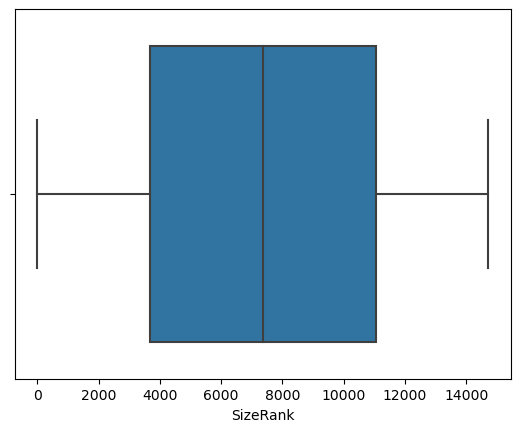

In [35]:
sns.boxplot(x = df['SizeRank']);

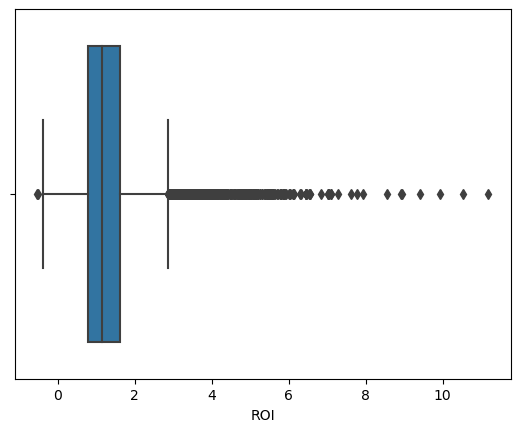

In [36]:
sns.boxplot(x= df['ROI'])
plt.show()

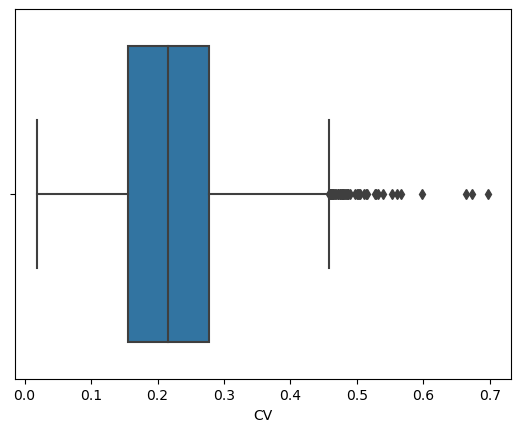

In [37]:
sns.boxplot(x= df['CV'])
plt.show()

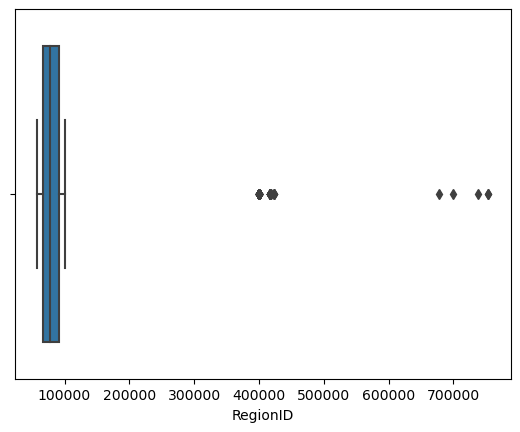

In [38]:
sns.boxplot(x= df['RegionID'])
plt.show()

## 4.2.1 Removing outliers

In [39]:
#creating the outliers list from columns with outliers
columns_with_outliers = ['ROI','CV' ]

#Creating a loop for removing outliers
for col in columns_with_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    
   # Calculate IQR
    iqr = q3 - q1

  # using a dynamic multiplier instead of using a fixed multiplier eg 1.5
    lower_bound = q1 - (1.5 * iqr * (len(df[col])/(len(df[col]) + 1)))
    upper_bound = q3 + (1.5 * iqr * (len(df[col])/(len(df[col]) + 1)))
    df[col] = df[col][~((df[col] < lower_bound) | (df[col] > upper_bound))]

#Verifying for changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 274 entries, RegionID to CV
dtypes: float64(221), int64(48), object(4), string(1)
memory usage: 30.8+ MB


## 4.3 HANDLING MISSING VALUES
We shall check if there are an missing values in the df dataset

In [40]:
#checking for any missing values in the dataset
df.isnull().sum()

RegionID       0
ZipCode        0
City           0
State          0
Metro       1043
            ... 
2018-02        0
2018-03        0
2018-04        0
ROI         1775
CV            53
Length: 274, dtype: int64

## 4.3.1 Filling missing values

In [41]:
#filling the missing values with using 'ffill' method
df.fillna(method='ffill', inplace=True)

In [42]:
#checking if there are more missing values and if they are filled
df.isnull().sum()

RegionID    0
ZipCode     0
City        0
State       0
Metro       0
           ..
2018-02     0
2018-03     0
2018-04     0
ROI         0
CV          0
Length: 274, dtype: int64

#def get_datetimes(df):
    """
     #Takes a dataframem:
    #returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
   #"""
   date_columns = df.columns[1:]
    
    #datetime_columns = [col for col in date_columns if pd.to_datetime(df[col], format= '%Y-%m', errors='coerce').notna().all()]
    
    #df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime, format='%Y-%m')
    
    #return df


# 5. EDA and Visualization

#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}

#plt.rc('font', **font)

#NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [43]:
#selecting the columns to use in eda
eda_df = df[['RegionID','ZipCode','City','State','Metro','CountyName','SizeRank', 'ROI','CV']]
eda_df.head()

RegionID ZipCode      City State              Metro CountyName  SizeRank   
0     84654   60657   Chicago    IL            Chicago       Cook         1  \
1     90668   75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982   77494      Katy    TX            Houston     Harris         3   
3     84616   60614   Chicago    IL            Chicago       Cook         4   
4     93144   79936   El Paso    TX            El Paso    El Paso         5   

        ROI        CV  
0  2.083782  0.256487  
1  0.365295  0.152680  
2  0.567966  0.143950  
3  1.623971  0.237364  
4  0.571798  0.178326

In [44]:
Numeric_cols = eda_df[['RegionID','SizeRank','ROI','CV']]
Numeric_cols.head()

RegionID  SizeRank       ROI        CV
0     84654         1  2.083782  0.256487
1     90668         2  0.365295  0.152680
2     91982         3  0.567966  0.143950
3     84616         4  1.623971  0.237364
4     93144         5  0.571798  0.178326

In [45]:
# getting the coefficient
Numeric_cols.corr()

RegionID  SizeRank       ROI        CV
RegionID  1.000000 -0.086092  0.042189  0.047392
SizeRank -0.086092  1.000000 -0.050865 -0.189323
ROI       0.042189 -0.050865  1.000000  0.582191
CV        0.047392 -0.189323  0.582191  1.000000

-RegionID has a positive correlation with ROI and CV (0.0421 and 0.0473 respectively)indicating that as RegionID increases it has very minimal effect to the variables. Though it has a negative effect with SizeRank, whereby an increase in the variable leads to a decrease to SizeRank variable.\
-SizeRank has a weak negative correlation with RegionID, ROI and CV (0.086092,-0.050865,-0.189323 respectively). This indicates that as size rank increases, the other variables decreases with a small margin.\
-ROI has a weak positive correlation with the other variables (0.042189,0.582191 )apart from SizeRank (-0.0509). As ROI increases as you go up the RegionID and CV tends to increase also but has inverse effect on SizeRank variable.\
-CV has a weak positive correlation with ROI and RegionID (0.047392, 0.582191 respectively). Resulting to an increase in the variables as CV increases.

In [46]:
for col in Numeric_cols:
    eda_df.loc[:,col] = pd.to_numeric(eda_df[col])

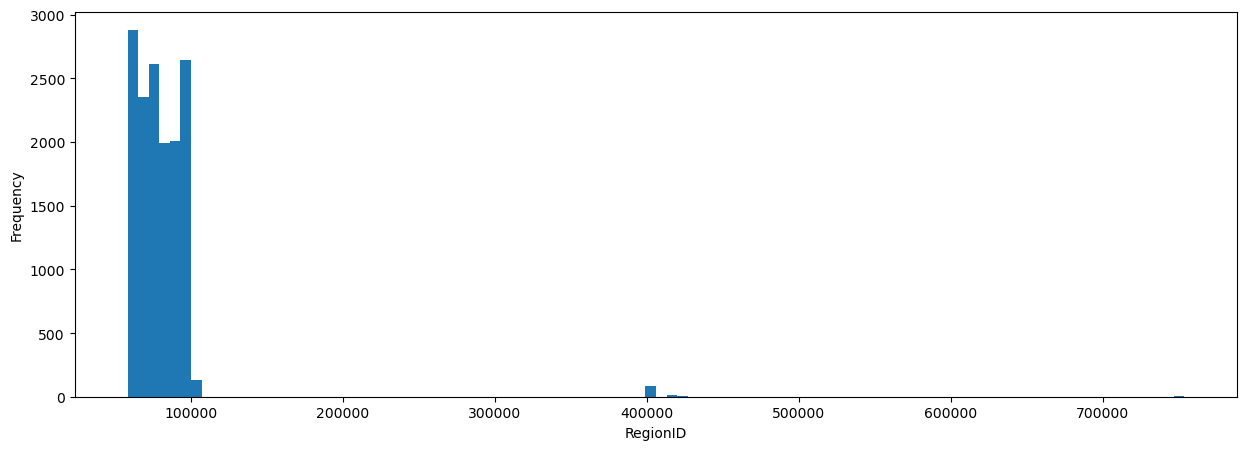

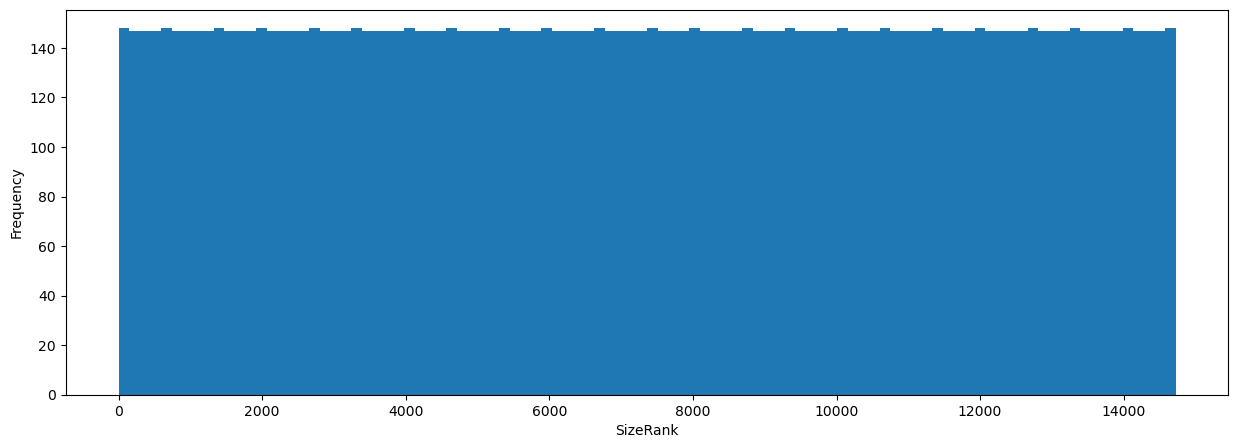

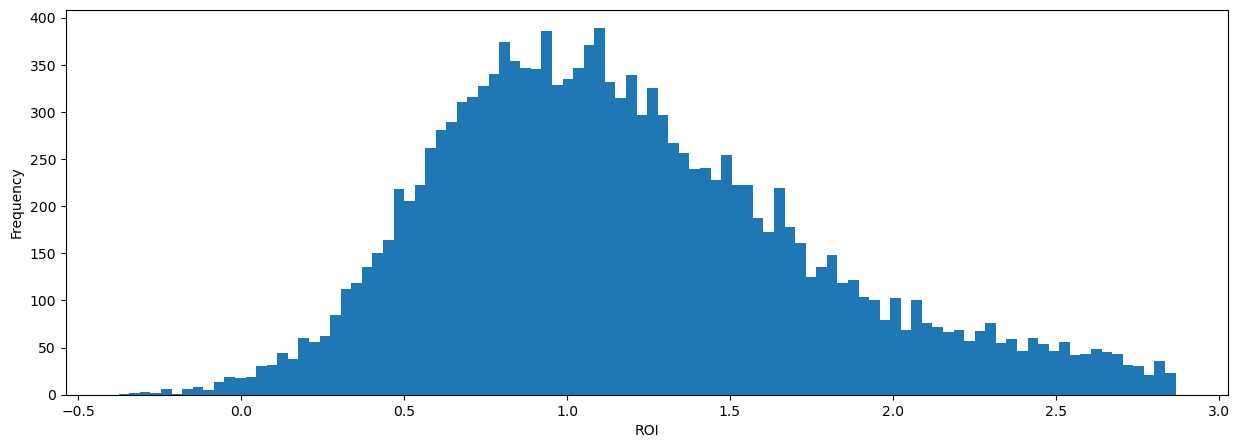

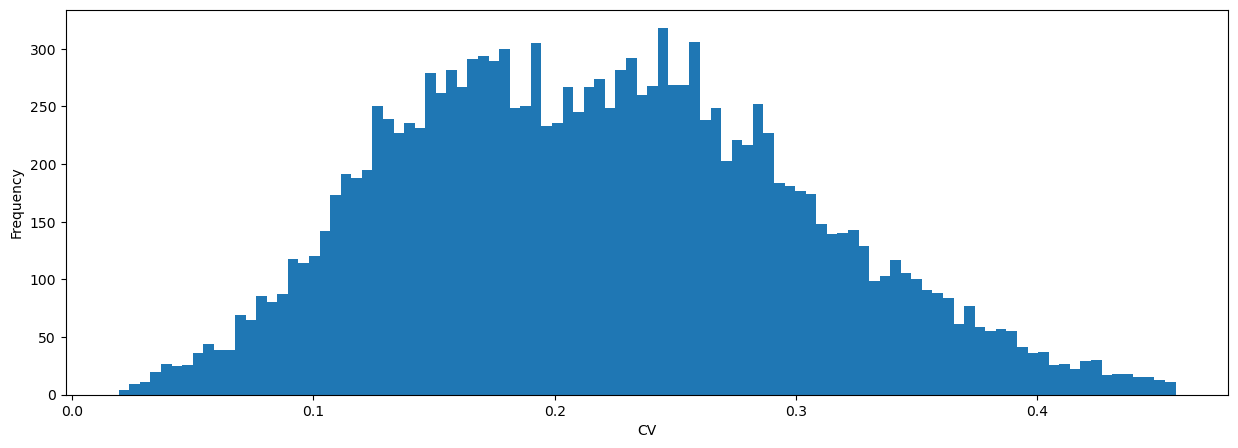

In [47]:
for column in Numeric_cols:
    plt.figure(figsize=(15,5))
    plt.hist(eda_df[column], bins = 100)
    plt.xlabel(column, size=10)
    plt.ylabel('Frequency', size =10)
    plt.show();

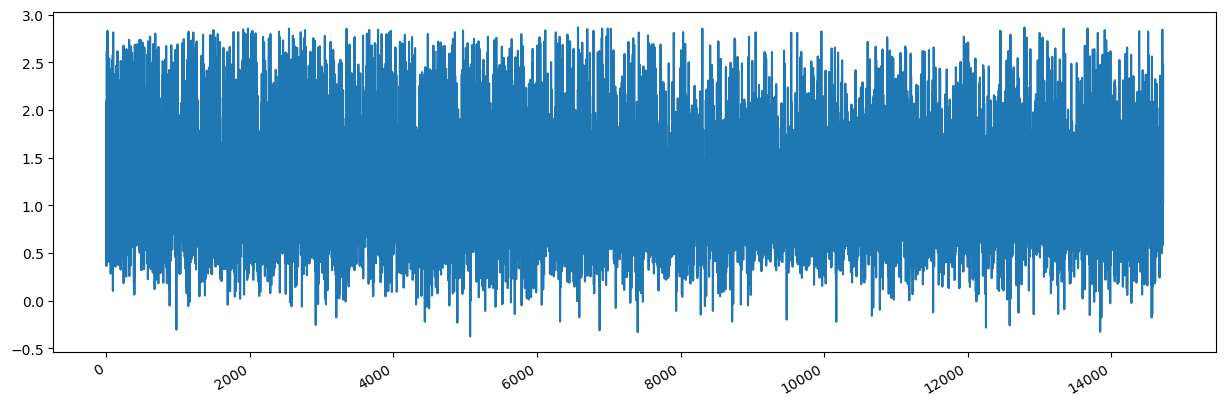

In [48]:
#plot a line graph for ROI column
plt.figure(figsize=(15,5))
plt.plot(eda_df['ROI'])
plt.gcf().autofmt_xdate()


"From the graph above, it is not clear 

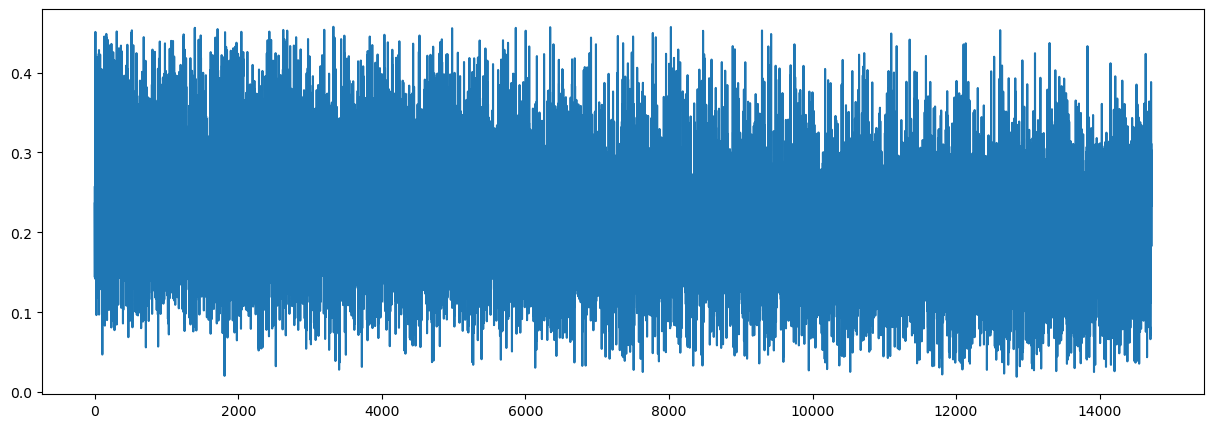

In [49]:
#plot a line graph for ROI column
plt.figure(figsize=(15,5))
plt.plot(eda_df['CV'])
plt.show();

# 6. Reshape from Wide to Long Format

In [50]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    #melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    #melted = melted.dropna(subset=['value'])
    return melted

In [51]:
#create a copy of df
long_df = df.copy()
#dropping the roi and cv columns
long_df.drop(columns=['ROI','CV'], inplace=True)

long_df.head(20)

RegionID ZipCode           City State                           Metro   
0      84654   60657        Chicago    IL                         Chicago  \
1      90668   75070       McKinney    TX               Dallas-Fort Worth   
2      91982   77494           Katy    TX                         Houston   
3      84616   60614        Chicago    IL                         Chicago   
4      93144   79936        El Paso    TX                         El Paso   
5      91733   77084        Houston    TX                         Houston   
6      61807   10467       New York    NY                        New York   
7      84640   60640        Chicago    IL                         Chicago   
8      91940   77449           Katy    TX                         Houston   
9      97564   94109  San Francisco    CA                   San Francisco   
10     62037   11226       New York    NY                        New York   
11     71831   32162   The Villages    FL                    The Villages   
12     62087   11375       New York    NY                        New York   
13     62045   11235       New York    NY                        New York   
14     74101   37013      Nashville    TN                       Nashville   
15     96107   90250      Hawthorne    CA  Los Angeles-Long Beach-Anaheim   
16     84646   60647        Chicago    IL                         Chicago   
17     74242   37211      Nashville    TN                       Nashville   
18     92593   78660   Pflugerville    TX                          Austin   
19     84620   60618        Chicago    IL                         Chicago   

       CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07   
0            Cook         1  334200.0  335400.0  336500.0  ...  1005500  \
1          Collin         2  235700.0  236900.0  236700.0  ...   308000   
2          Harris         3  210400.0  212200.0  212200.0  ...   321000   
3            Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4         El Paso         5   77300.0   77300.0   77300.0  ...   119100   
5          Harris         6   95000.0   95200.0   95400.0  ...   157900   
6           Bronx         7  152900.0  152700.0  152600.0  ...   394400   
7            Cook         8  216500.0  216700.0  216900.0  ...   798000   
8          Harris         9   95400.0   95600.0   95800.0  ...   166800   
9   San Francisco        10  766000.0  771100.0  776500.0  ...  3767700   
10          Kings        11  162000.0  162300.0  162600.0  ...   860200   
11         Sumter        12  101000.0  100700.0  100400.0  ...   249900   
12         Queens        13  252400.0  251800.0  251400.0  ...  1022600   
13          Kings        14  190500.0  191000.0  191500.0  ...   767300   
14       Davidson        15  112400.0  112700.0  113000.0  ...   193000   
15    Los Angeles        16  152500.0  152600.0  152600.0  ...   579300   
16           Cook        17  122700.0  122800.0  122800.0  ...   459600   
17       Davidson        18   97900.0   98000.0   98200.0  ...   243100   
18         Travis        19  138900.0  138600.0  138400.0  ...   235000   
19           Cook        20  142600.0  143100.0  143400.0  ...   462700   

    2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03   
0   1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800  \
1    310000   312500   314100   315000   316600   318100   319600   321100   
2    320600   320200   320400   320800   321200   321200   323000   326900   
3   1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4    119400   120000   120300   120300   120300   120300   120500   121000   
5    158700   160200   161900   162800   162800   162800   162900   163500   
6    400000   407300   411600   413200   414300   413900   411400   413200   
7    787100   776100   774900   777900   777900   778500   780500   782800   
8    167400   168400   169600   170900   172300   173300   174200   175400   
9   3763900  3775000  3799700 

In [52]:
melt_df = melt_data(long_df)
melt_df

ZipCode  RegionID  SizeRank                 City State   
0         60657     84654         1              Chicago    IL  \
1         75070     90668         2             McKinney    TX   
2         77494     91982         3                 Katy    TX   
3         60614     84616         4              Chicago    IL   
4         79936     93144         5              El Paso    TX   
...         ...       ...       ...                  ...   ...   
3901590    1338     58333     14719             Ashfield    MA   
3901591    3293     59107     14720            Woodstock    NH   
3901592   40404     75672     14721                Berea    KY   
3901593   81225     93733     14722  Mount Crested Butte    CO   
3901594   89155     95851     14723             Mesquite    NV   

                     Metro CountyName     time     value  
0                  Chicago       Cook  1996-04  334200.0  
1        Dallas-Fort Worth     Collin  1996-04  235700.0  
2                  Houston     Harris  1996-04  210400.0  
3                  Chicago       Cook  1996-04  498100.0  
4                  El Paso    El Paso  1996-04   77300.0  
...                    ...        ...      ...       ...  
3901590    Greenfield Town   Franklin  2018-04  209300.0  
3901591          Claremont    Grafton  2018-04  225800.0  
3901592           Richmond    Madison  2018-04  133400.0  
3901593           Richmond   Gunnison  2018-04  664400.0  
3901594          Las Vegas      Clark  2018-04  357200.0  

[3901595 rows x 9 columns]

## 6.1 Creating datetime using time column

In [53]:
melt_df['time'] = pd.to_datetime(melt_df['time'], format='%Y-%m')
melt_df

ZipCode  RegionID  SizeRank                 City State   
0         60657     84654         1              Chicago    IL  \
1         75070     90668         2             McKinney    TX   
2         77494     91982         3                 Katy    TX   
3         60614     84616         4              Chicago    IL   
4         79936     93144         5              El Paso    TX   
...         ...       ...       ...                  ...   ...   
3901590    1338     58333     14719             Ashfield    MA   
3901591    3293     59107     14720            Woodstock    NH   
3901592   40404     75672     14721                Berea    KY   
3901593   81225     93733     14722  Mount Crested Butte    CO   
3901594   89155     95851     14723             Mesquite    NV   

                     Metro CountyName       time     value  
0                  Chicago       Cook 1996-04-01  334200.0  
1        Dallas-Fort Worth     Collin 1996-04-01  235700.0  
2                  Houston     Harris 1996-04-01  210400.0  
3                  Chicago       Cook 1996-04-01  498100.0  
4                  El Paso    El Paso 1996-04-01   77300.0  
...                    ...        ...        ...       ...  
3901590    Greenfield Town   Franklin 2018-04-01  209300.0  
3901591          Claremont    Grafton 2018-04-01  225800.0  
3901592           Richmond    Madison 2018-04-01  133400.0  
3901593           Richmond   Gunnison 2018-04-01  664400.0  
3901594          Las Vegas      Clark 2018-04-01  357200.0  

[3901595 rows x 9 columns]

In [120]:
#checking for any missing value after convertion to long format
melt_df.isnull().sum()

ZipCode       0
RegionID      0
SizeRank      0
City          0
State         0
Metro         0
CountyName    0
time          0
value         0
dtype: int64

In [54]:
#checking if time column is datatime dtype
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ZipCode     string        
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   time        datetime64[ns]
 8   value       float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4), string(1)
memory usage: 267.9+ MB


## 6.2 Grouping data 

In [55]:
zipcode_grouped = melt_df.groupby('ZipCode').aggregate({'time':'max'}) - melt_df.groupby('ZipCode').aggregate({'time':'min'})
zipcode_grouped

time
ZipCode          
1001    8035 days
10011   8035 days
10014   8035 days
1002    8035 days
10021   8035 days
...           ...
99709   8035 days
99712   8035 days
99801   8035 days
99835   8035 days
99901   8035 days

[14723 rows x 1 columns]

In [56]:
# Group the melted DataFrame by 'RegionID'
grouped = melt_df.groupby('ZipCode')

# Create a dictionary to store mini DataFrames
mini_dataframes = {}

# Iterate through the groups and create mini DataFrames
for region_id, group_df in grouped:
    mini_dataframes[region_id] = group_df

In [61]:
melt_df_1 = mini_dataframes['1001']
melt_df_1

ZipCode  RegionID  SizeRank    City State        Metro CountyName   
5850       1001     58196      5851  Agawam    MA  Springfield    Hampden  \
20573      1001     58196      5851  Agawam    MA  Springfield    Hampden   
35296      1001     58196      5851  Agawam    MA  Springfield    Hampden   
50019      1001     58196      5851  Agawam    MA  Springfield    Hampden   
64742      1001     58196      5851  Agawam    MA  Springfield    Hampden   
...         ...       ...       ...     ...   ...          ...        ...   
3833830    1001     58196      5851  Agawam    MA  Springfield    Hampden   
3848553    1001     58196      5851  Agawam    MA  Springfield    Hampden   
3863276    1001     58196      5851  Agawam    MA  Springfield    Hampden   
3877999    1001     58196      5851  Agawam    MA  Springfield    Hampden   
3892722    1001     58196      5851  Agawam    MA  Springfield    Hampden   

              time     value  
5850    1996-04-01  113100.0  
20573   1996-05-01  112800.0  
35296   1996-06-01  112600.0  
50019   1996-07-01  112300.0  
64742   1996-08-01  112100.0  
...            ...       ...  
3833830 2017-12-01  221700.0  
3848553 2018-01-01  221700.0  
3863276 2018-02-01  221700.0  
3877999 2018-03-01  222700.0  
3892722 2018-04-01  223600.0  

[265 rows x 9 columns]

## 6.3 Setting 'time' index

In [62]:
#setting time as index
melt_df_1.set_index('time', inplace=True)

melt_df_1.head(20)

ZipCode  RegionID  SizeRank    City State        Metro CountyName   
time                                                                           
1996-04-01    1001     58196      5851  Agawam    MA  Springfield    Hampden  \
1996-05-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-06-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-07-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-08-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-09-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-10-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-11-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1996-12-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-01-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-02-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-03-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-04-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-05-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-06-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-07-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-08-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-09-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-10-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   
1997-11-01    1001     58196      5851  Agawam    MA  Springfield    Hampden   

               value  
time                  
1996-04-01  113100.0  
1996-05-01  112800.0  
1996-06-01  112600.0  
1996-07-01  112300.0  
1996-08-01  112100.0  
1996-09-01  111900.0  
1996-10-01  111800.0  
1996-11-01  111700.0  
1996-12-01  111700.0  
1997-01-01  111900.0  
1997-02-01  112100.0  
1997-03-01  112300.0  
1997-04-01  112500.0  
1997-05-01  112800.0  
1997-06-01  113000.0  
1997-07-01  113300.0  
1997-08-01  113600.0  
1997-09-01  113900.0  
1997-10-01  114200.0  
1997-11-01  114500.0

In [63]:
value_df = melt_df_1['value']
value_df

time
1996-04-01    113100.0
1996-05-01    112800.0
1996-06-01    112600.0
1996-07-01    112300.0
1996-08-01    112100.0
                ...   
2017-12-01    221700.0
2018-01-01    221700.0
2018-02-01    221700.0
2018-03-01    222700.0
2018-04-01    223600.0
Name: value, Length: 265, dtype: float64

## 6.4 Plotting graphs

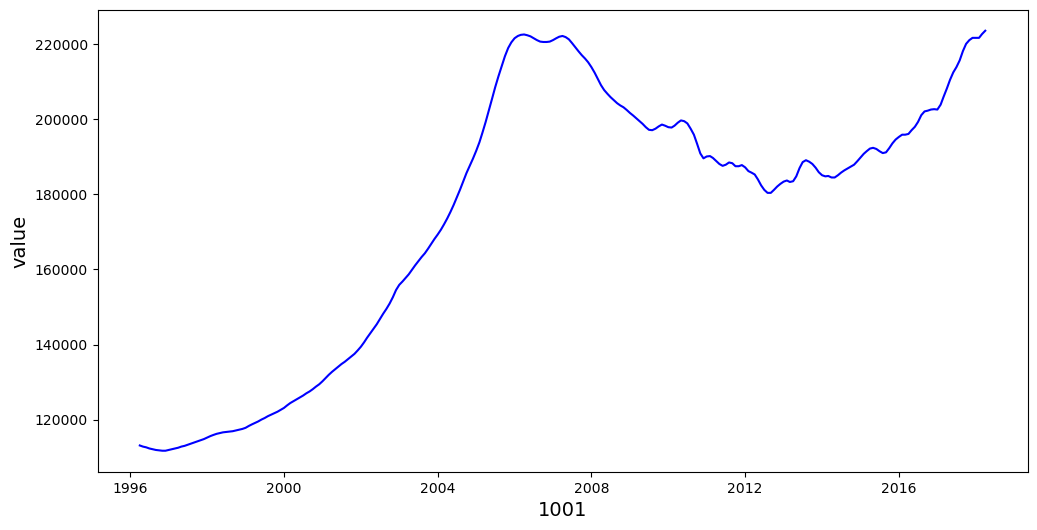

In [64]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_df, color='blue')
plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.show()

From the graph above we see that the time series graph is not stationary due to the upward linear trend shown.

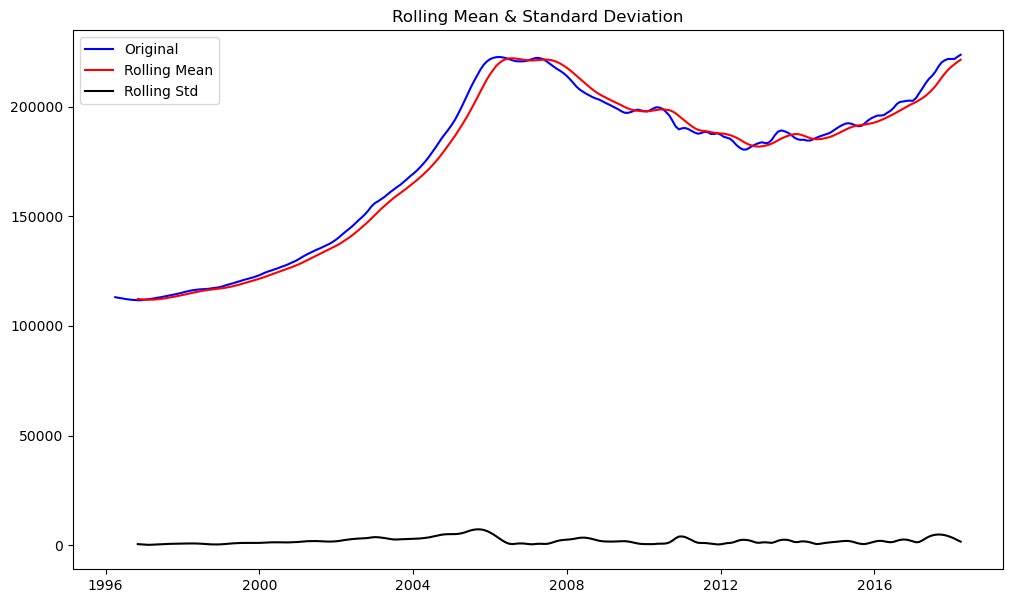

In [65]:
roll_mean = value_df.rolling(window=8, center=False).mean()
roll_std = value_df.rolling(window=8, center=False).std()

fig = plt.figure(figsize=(12,7))
plt.plot(value_df, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## 6.5 Differencing and plotting graphs of differenced data

In [66]:
value_diff = value_df.diff().dropna()
value_diff

time
1996-05-01    -300.0
1996-06-01    -200.0
1996-07-01    -300.0
1996-08-01    -200.0
1996-09-01    -200.0
               ...  
2017-12-01     600.0
2018-01-01       0.0
2018-02-01       0.0
2018-03-01    1000.0
2018-04-01     900.0
Name: value, Length: 264, dtype: float64

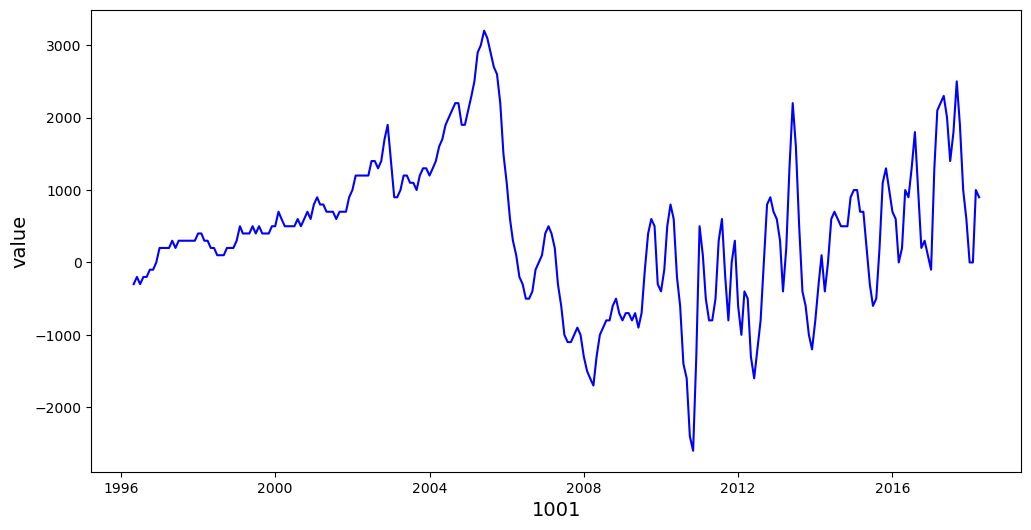

In [67]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_diff, color='blue')
plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.show()

## 6.6 Perform the Dickey Fuller test


In [68]:
#initiate adfuller function with value_diff parameter
dftest = adfuller(value_diff)

# Print Dickey-Fuller test results
print('Results of Dickey-Fuller Test: \n')
print(dftest)

Results of Dickey-Fuller Test: 

(-1.945352547003753, 0.3110356104138351, 12, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 3552.048382789642)


In [69]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])

print(dfoutput)

Test Statistic                  -1.945353
p-value                          0.311036
#Lags Used                      12.000000
Number of Observations Used    251.000000
dtype: float64


## 6.7 Plotting Autocorrelation and Partial Correlation Graphs

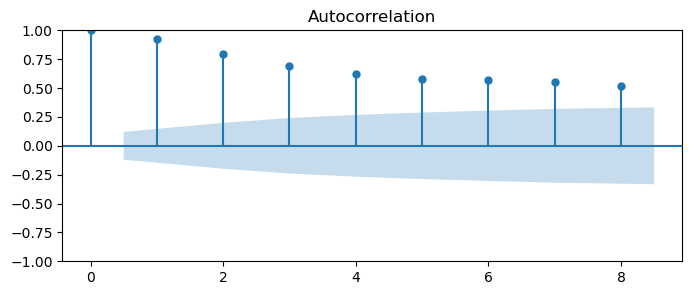

In [70]:
# Plot the ACF

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(value_diff, ax=ax, lags=8);

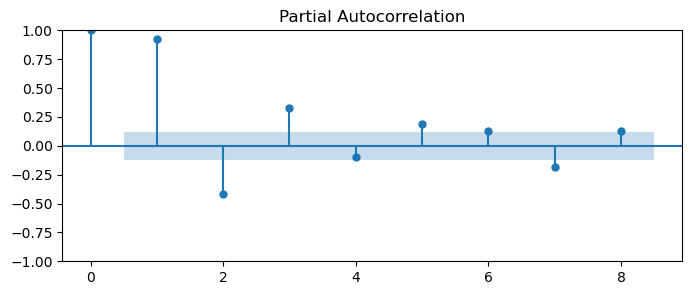

In [71]:
# Plot the PACF

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(value_diff, ax=ax, lags=8, method="ywm");

# 7. ARIMA Modeling

## 7.1 ARMA model 1

In [76]:
#initiating ARIMA(1,0) model with value differencing and order parameter
arma = ARIMA(value_diff, order=(1, 0, 0))
#fit the model
res_arma_1 = arma.fit()


C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
print(res_arma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1942.902
Date:                Sun, 17 Sep 2023   AIC                           3891.804
Time:                        20:50:21   BIC                           3902.532
Sample:                    05-01-1996   HQIC                          3896.115
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.5606    308.199      1.358      0.174    -185.498    1022.619
ar.L1          0.9234      0.021     43.051      0.000       0.881       0.965
sigma2      1.437e+05   9374.772     15.330      0.0

## 7.2 ARMA Model 2

In [79]:
# Fit an ARMA(2,1) model
arma_2 = ARIMA(value_diff, order=(2, 0, 1))
res_arma_2 = arma_2.fit()

# Print out summary information on the fit
print(res_arma_2.summary())

C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1900.746
Date:                Sun, 17 Sep 2023   AIC                           3811.492
Time:                        20:50:33   BIC                           3829.372
Sample:                    05-01-1996   HQIC                          3818.677
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.5605    226.918      1.845      0.065     -26.191     863.313
ar.L1          0.9601      0.065     14.707      0.000       0.832       1.088
ar.L2         -0.1010      0.067     -1.501      0.1

## 7.3 ARMA 3

In [80]:
# Fit an ARMA(2,2) model
arma_3 = ARIMA(value_diff, order=(2, 0, 2))
res_arma_3 = arma_3.fit()

# Print out summary information on the fit
print(res_arma_3.summary())

C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  264
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1900.071
Date:                Sun, 17 Sep 2023   AIC                           3812.142
Time:                        20:50:46   BIC                           3833.598
Sample:                    05-01-1996   HQIC                          3820.764
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        418.5569    385.948      1.084      0.278    -337.887    1175.001
ar.L1          1.6903      0.157     10.759      0.000       1.382       1.998
ar.L2         -0.7012      0.141     -4.963      0.0

# 7. Interpreting Results

From the first model which is our baseline model we see that:\ 

The constant coefficient is not statistically significant because the p-value is 0.174, which is greater than the typical significance level of 0.05.\

The ar.L1 coefficient is highly statistically significant with a very low p-value since it is close to zero, indicating a strong positive autocorrelation in the data at lag 1.\

The sigma2 represents the estimated variance of the residuals.

From the second model, we see that:\

The constant in our ARIMA model, the estimated constant is approximately 418.5605.

The ar.L1, the estimated value is approximately 0.9601, indicating a strong positive correlation.

The ar.L2, the estimated value is approximately -0.1010, suggesting a weaker negative correlation.

The ma.L1, which reflects the impact of past white noise error terms on the current observation. Therefore, the estimated value is approximately 0.5446, indicating a positive impact from the previous error term.

The sigma2, the estimated variance is approximately 1.049e+05.

From the final model, we see that:\
The constant, shows the estimated constant is approximately 418.5569.

The ar.L1, shows the estimated value is approximately 1.6903, indicating a strong positive correlation.

The ar.L2, shows the estimated value is approximately -0.7012, suggesting a negative correlation.

The ma.L1, shows the estimated value is approximately -0.2732, indicating a negative impact from the previous error term.

The ma.L2, shows the estimated value is approximately -0.5362, indicating a negative impact.

The sigma2, in this case, the estimated variance is approximately 1.029e+05.



# 8. Forecasting

In [83]:
n_forecast = 10  # Example: Number of periods to forecast
forecast = res_arma_3.forecast(steps=n_forecast)
                                       

In [84]:
forecast

2018-05-01    564.426024
2018-06-01    596.142469
2018-07-01    616.435902
2018-08-01    628.496589
2018-09-01    634.651935
2018-10-01    636.598750
2018-11-01    635.573046
2018-12-01    632.474154
2019-01-01    627.955448
2019-02-01    622.490668
Freq: MS, Name: predicted_mean, dtype: float64

In [86]:
residuals = res_arma_3.resid


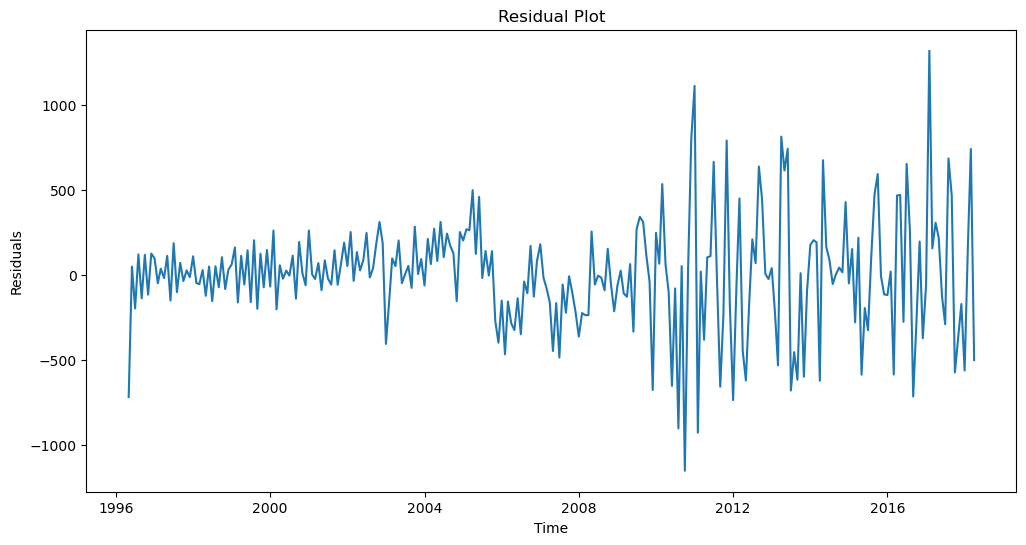

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [88]:
predictions = res_arma_3.predict(start=0, end=len(value_df) - 1, typ='levels')

C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [89]:
predictions

1996-05-01     418.556912
1996-06-01    -248.968570
1996-07-01    -102.453843
1996-08-01    -320.423192
1996-09-01     -62.208972
                 ...     
2018-01-01     562.485343
2018-02-01    -170.796618
2018-03-01     259.532715
2018-04-01    1400.997884
2018-05-01     564.426024
Freq: MS, Name: predicted_mean, Length: 265, dtype: float64

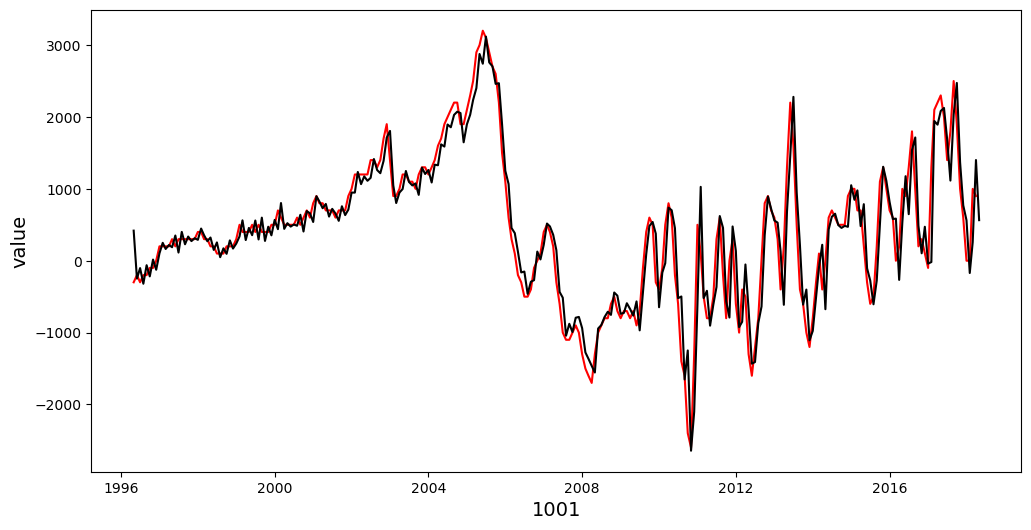

In [93]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_diff, color='red')
plt.plot(predictions, color='black', label= 'predictions')
plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.show()

In [94]:
import numpy as np
forecasts_original_scale = value_df.iloc[0] + np.cumsum(np.cumsum(predictions))

In [95]:
forecasts_original_scale

1996-05-01    1.135186e+05
1996-06-01    1.136881e+05
1996-07-01    1.137553e+05
1996-08-01    1.135020e+05
1996-09-01    1.131865e+05
                  ...     
2018-01-01    1.597349e+07
2018-02-01    1.608194e+07
2018-03-01    1.619065e+07
2018-04-01    1.630076e+07
2018-05-01    1.641144e+07
Freq: MS, Name: predicted_mean, Length: 265, dtype: float64

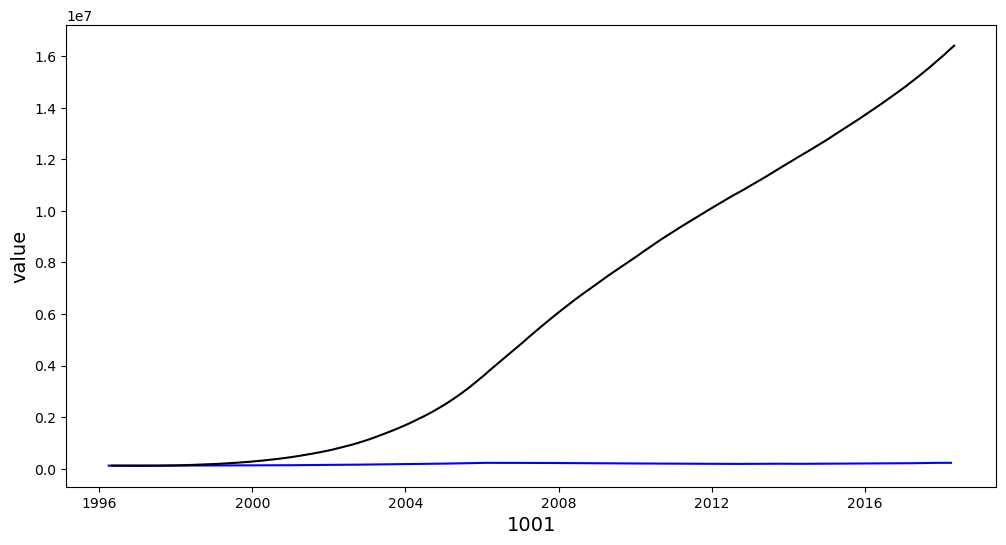

In [97]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_df, color='blue')
plt.plot(forecasts_original_scale, color='black')
plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(value_df, forecasts_original_scale, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 7932701.297595864


In [99]:
future_predictions = res_arma_3.predict(start=len(value_df) , end=len(value_df) + 100, typ='levels')

C:\Users\Lynn\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [100]:
future_predictions = value_df.iloc[-1] + np.cumsum(np.cumsum(future_predictions))

In [101]:
future_predictions 

2018-06-01    2.241961e+05
2018-07-01    2.254087e+05
2018-08-01    2.272498e+05
2018-09-01    2.297255e+05
2018-10-01    2.328378e+05
                  ...     
2026-06-01    2.711222e+06
2026-07-01    2.758983e+06
2026-08-01    2.807169e+06
2026-09-01    2.855777e+06
2026-10-01    2.904809e+06
Freq: MS, Name: predicted_mean, Length: 101, dtype: float64

In [103]:
n_forecast = 100  # Example: Number of periods to forecast
forecast = res_arma_3.forecast(steps=n_forecast)

In [104]:
forecast_predictions = value_df.iloc[-1] + np.cumsum(np.cumsum(forecast))

In [105]:
forecast_predictions

2018-05-01    2.241644e+05
2018-06-01    2.253250e+05
2018-07-01    2.271020e+05
2018-08-01    2.295075e+05
2018-09-01    2.325477e+05
                  ...     
2026-04-01    2.671155e+06
2026-05-01    2.718633e+06
2026-06-01    2.766536e+06
2026-07-01    2.814862e+06
2026-08-01    2.863611e+06
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

In [111]:
forecast.head(20)

2018-05-01    564.426024
2018-06-01    596.142469
2018-07-01    616.435902
2018-08-01    628.496589
2018-09-01    634.651935
2018-10-01    636.598750
2018-11-01    635.573046
2018-12-01    632.474154
2019-01-01    627.955448
2019-02-01    622.490668
2019-03-01    616.422388
2019-04-01    609.997453
2019-05-01    603.392871
2019-06-01    596.734733
2019-07-01    590.112049
2019-08-01    583.586846
2019-09-01    577.201549
2019-10-01    570.984377
2019-11-01    564.953272
2019-12-01    559.118777
Freq: MS, Name: predicted_mean, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


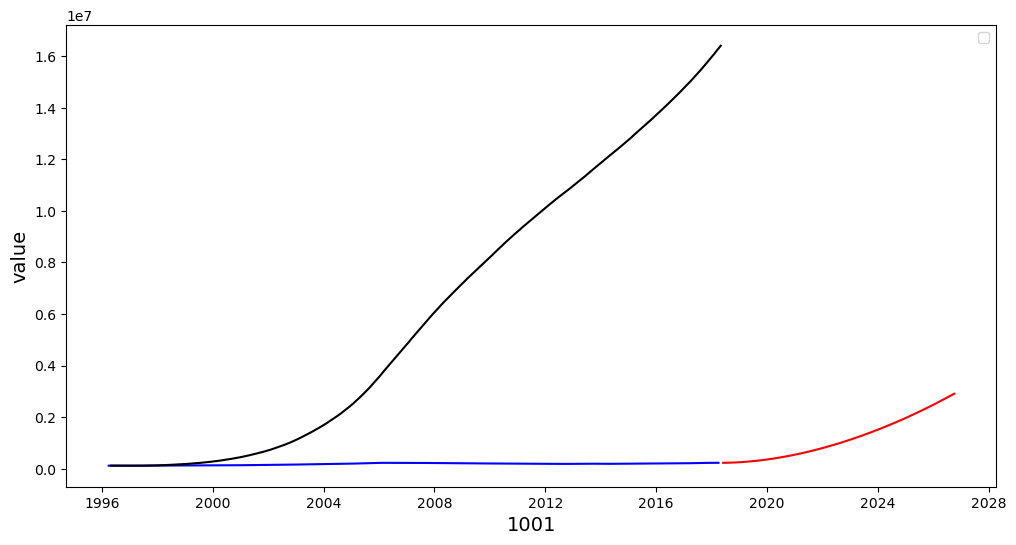

In [109]:
fig = plt.figure(figsize=(12,6))
plt.plot(value_df, color='blue')
plt.plot(forecasts_original_scale, color='black')
plt.plot(future_predictions ,color ='red')

plt.xlabel(melt_df_1.iloc[1]['ZipCode'], fontsize=14)
plt.ylabel('value', fontsize=14)
plt.legend()
plt.show()

The model predicts that from 2016 till around 2019, the trend will be constant but afterwards (2019 onwards) there will be an upwards trend.

# 8. Conclusions

The final ARMA model after iterations achieved a lower AIC and BIC value than the baseline model(ARMA model 1) which was 3812.142 and 3833.598 respectivelyindicating a better model.

The Root Mean Squared Error (RMSE) of predicted  7932701.297595864 indicating that deviation from the true values.\
This shows a higher prediction than the previous model.

From ROI and CV columns above, we can be able to get the top 5 zipcode to invest in due to their high Return on Investment and CV.\
When making decisions, we need to balance between the risk represented as CV and return potential represented as ROI.\
The higher the risk the higher the returns.

# 9. Recommendations

1. The company should consider investing in York(NewYork) which has the highest ROI of 2.8671, Santa Barbara (2.8667), Person (2.8569), Marin (2.8565), San Diego (2.8561)

2. Other factors such as infrastructure development should also be considered as it may have a big effect on house prices in the areas.

3. Cities such as Austin should be thoroughly explored due to the high price shown.